In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [2]:
csv_path = "/content/weather.csv"

In [6]:
df = pd.read_csv("weather.csv")
print("Preview of dataset:")
print(df.head())

Preview of dataset:
   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         

In [13]:
X = df[['MinTemp', 'MaxTemp', 'Rainfall',]]
y = df['Humidity3pm']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTrain samples:", X_train.shape, "Test samples:", X_test.shape)


Train samples: (292, 3) Test samples: (74, 3)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
print("\nModel trained.")


Model trained.


In [17]:
y_pred = model.predict(X_test)

In [22]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("\nMetrics on test set:")
print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R2   = {r2:.4f}")


Metrics on test set:
MAE  = 8.7744
MSE  = 138.9378
RMSE = 11.7872
R2   = 0.4628


In [23]:
comp = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.round(y_pred, 3)})
print("\nSample comparison:")
print(comp.head(6))


Sample comparison:
   Actual  Predicted
0      47     53.041
1      40     42.465
2      22     22.325
3      33     54.892
4      44     43.384
5      38     41.623


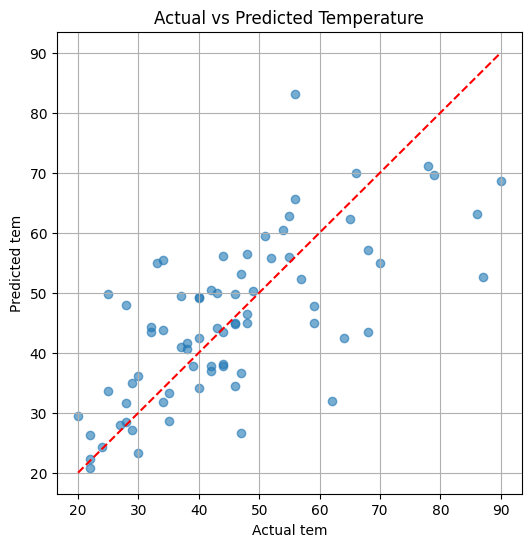

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
mn = min(y_test.min(), y_pred.min())
mx = max(y_test.max(), y_pred.max())
plt.plot([mn,mx],[mn,mx], 'r--')
plt.xlabel('Actual tem')
plt.ylabel('Predicted tem')
plt.title('Actual vs Predicted Temperature')
plt.grid(True)
plt.show()

In [29]:
new_row = pd.DataFrame({
    'MinTemp': [8],
    'MaxTemp': [22.8],
    'Rainfall': [0]
})
pred_new = model.predict(new_row)
print("\nPredicted tem for", new_row.to_dict(orient='records')[0], "->", round(pred_new[0],4))


Predicted tem for {'MinTemp': 8, 'MaxTemp': 22.8, 'Rainfall': 0} -> 39.2685


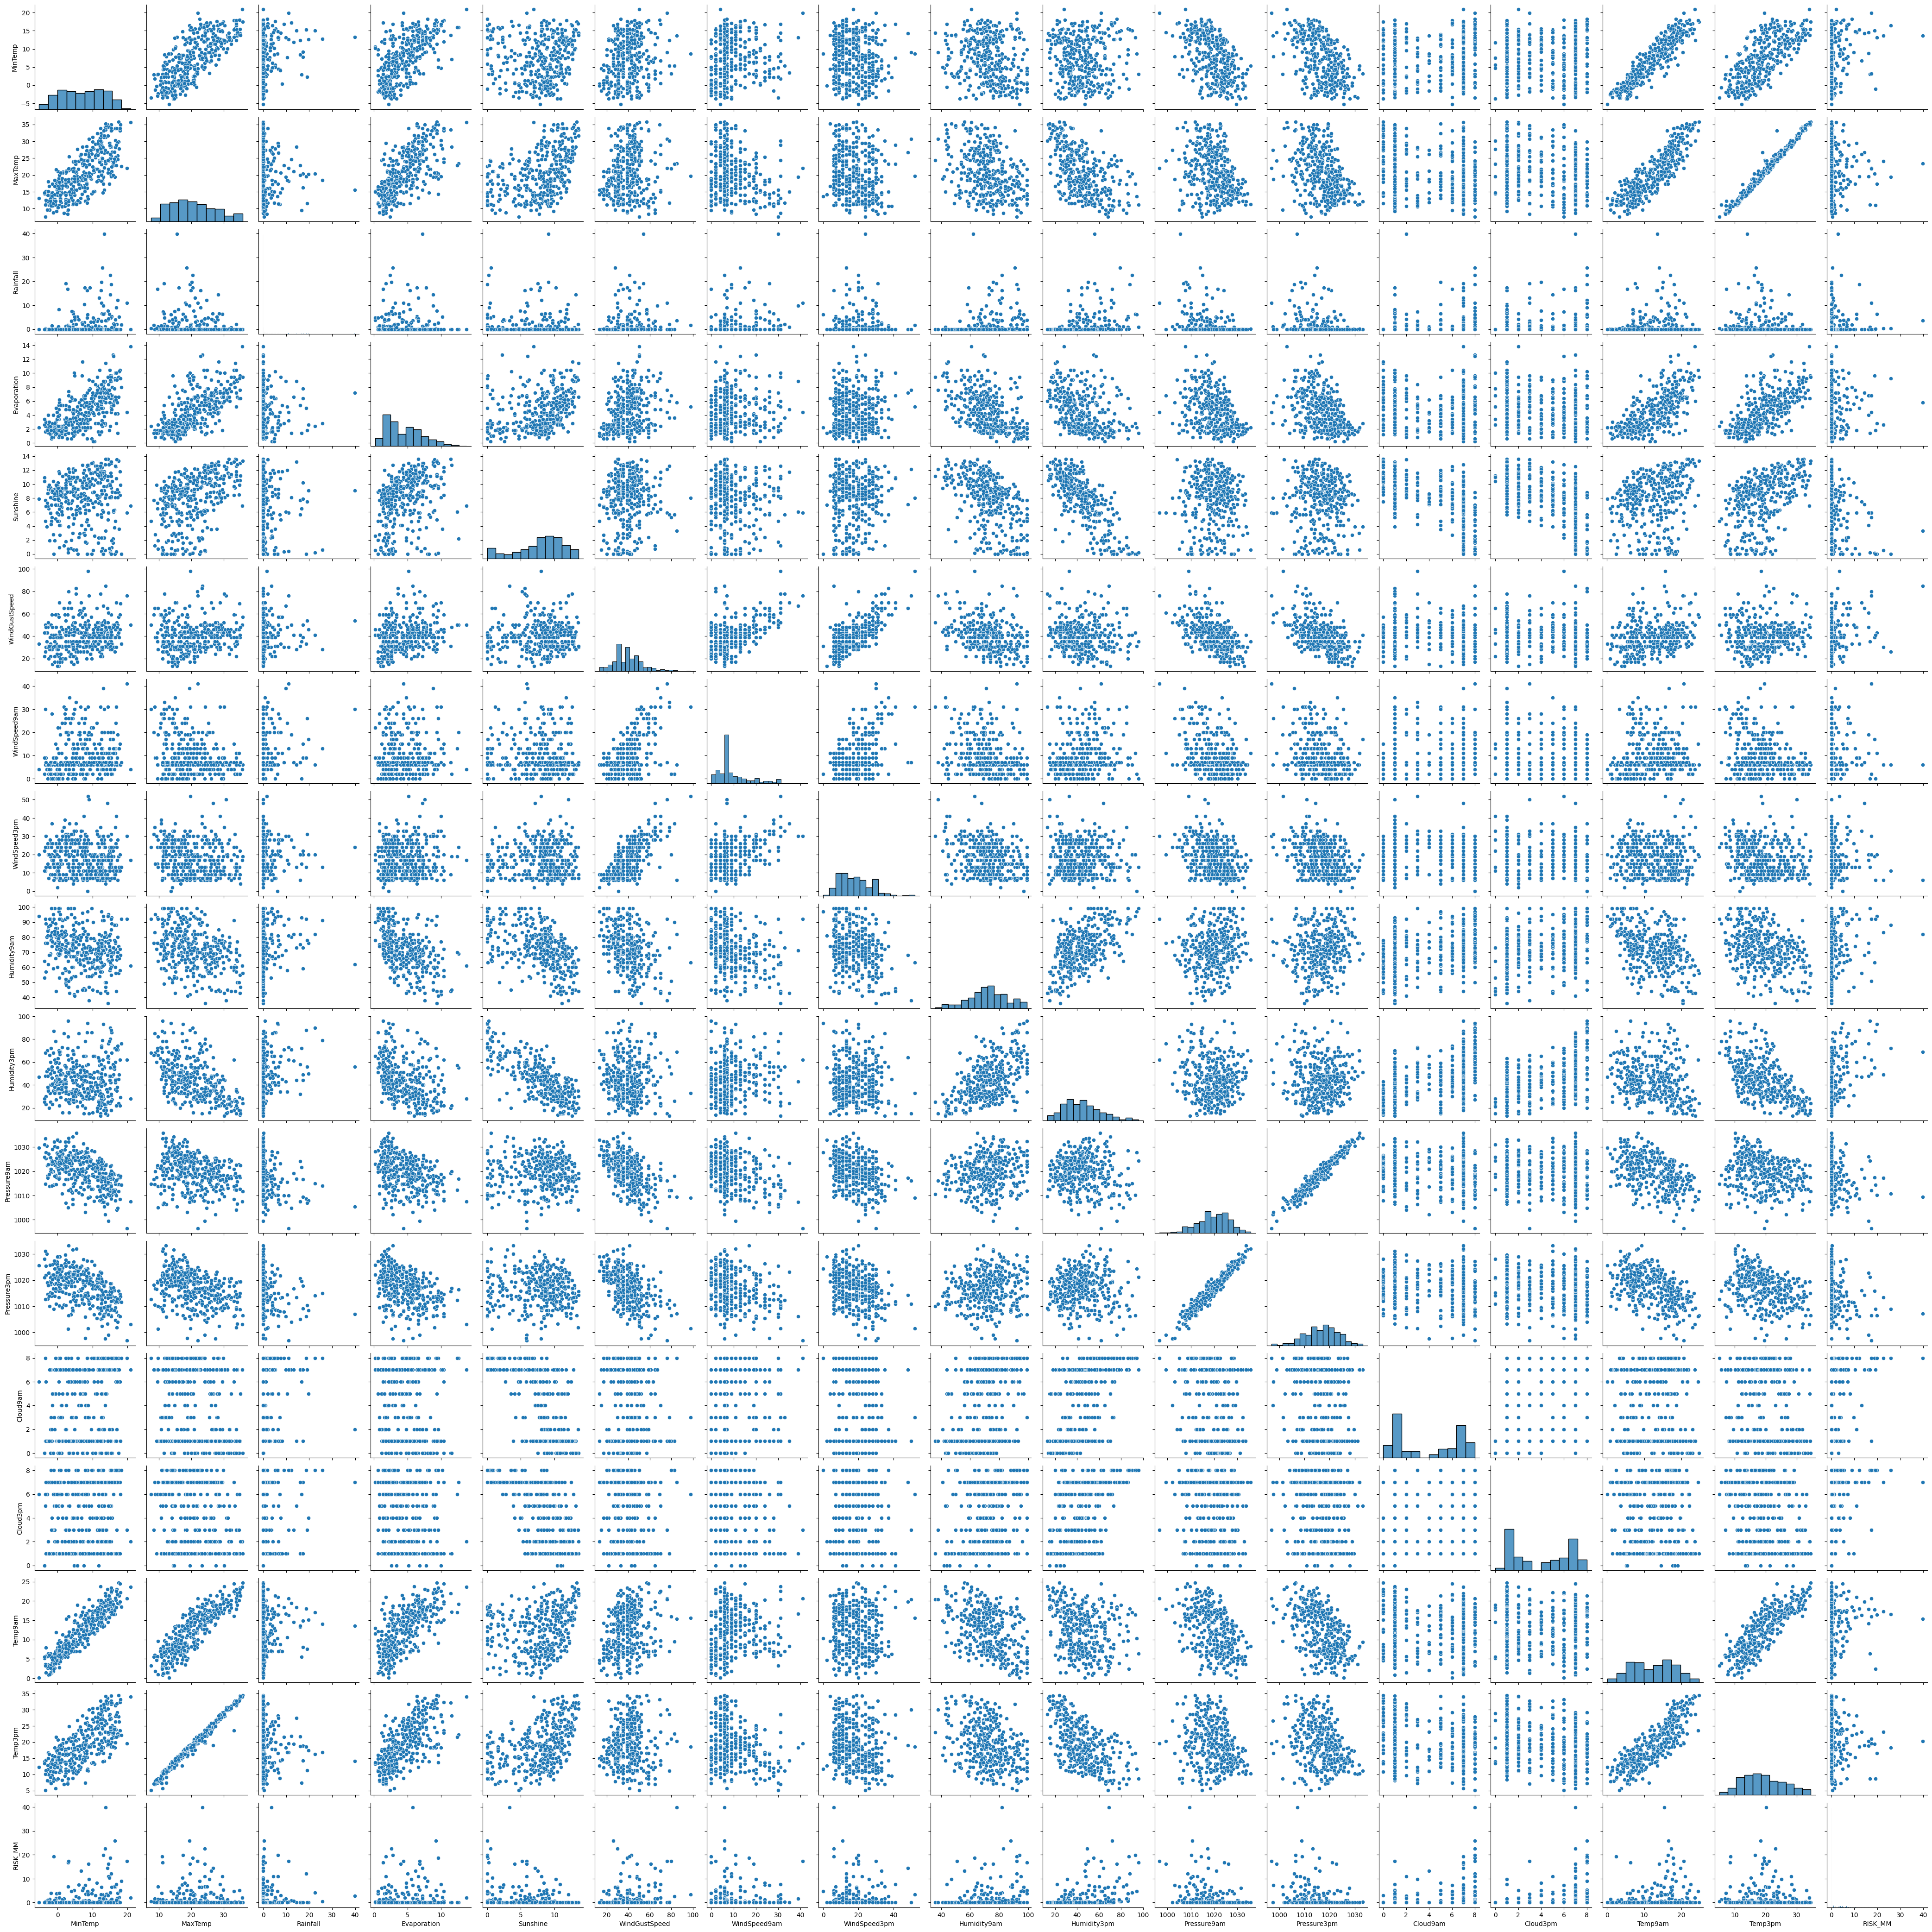

In [30]:
sns.pairplot(df)
plt.show()

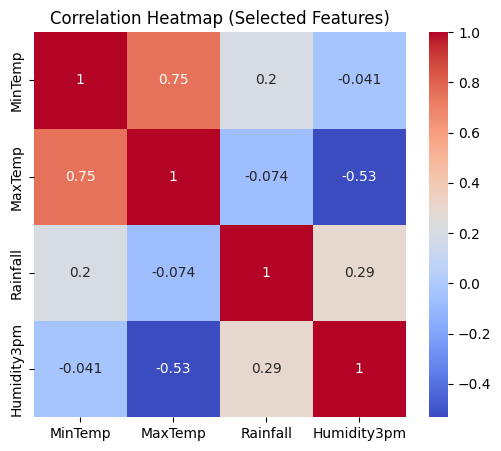

In [33]:
selected_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity3pm']
heatmap_df = df[selected_cols]
plt.figure(figsize=(6,5))
sns.heatmap(heatmap_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Selected Features)")
plt.show()


Error Comparison Table:
  Metric       Value
0    MAE    8.774352
1    MSE  138.937812
2   RMSE   11.787188
3     R2    0.462792


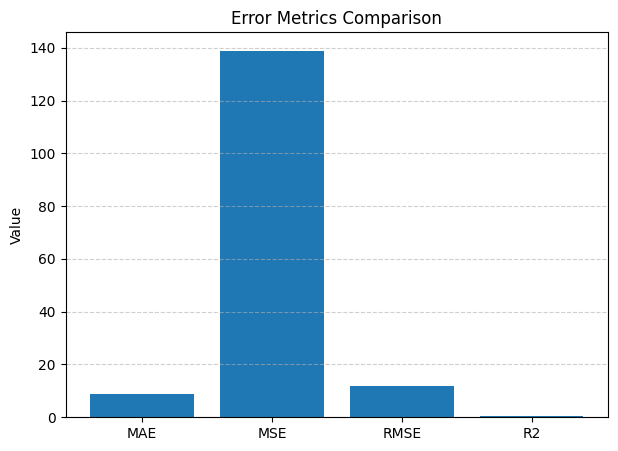

In [34]:
errors = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2
}
error_df = pd.DataFrame(list(errors.items()), columns=['Metric', 'Value'])
print("\nError Comparison Table:")
print(error_df)
plt.figure(figsize=(7,5))
plt.bar(error_df['Metric'], error_df['Value'])
plt.title("Error Metrics Comparison")
plt.ylabel("Value")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
